# Movie Recommendation System EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_bygenre=pd.read_csv('./data/bygenre.csv')

In [3]:
#df_bygenre=df_bygenre.set_index(['userId'])
df_bygenre.info()
df_bygenre.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162541 entries, 0 to 162540
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   userId                       162541 non-null  int64  
 1   Watch Number of Action       162541 non-null  float64
 2   Mean Rating of Action        161972 non-null  float64
 3   Watch Number of Adventure    162541 non-null  float64
 4   Mean Rating of Adventure     161808 non-null  float64
 5   Watch Number of Animation    162541 non-null  float64
 6   Mean Rating of Animation     139995 non-null  float64
 7   Watch Number of Children     162541 non-null  float64
 8   Mean Rating of Children      148365 non-null  float64
 9   Watch Number of Comedy       162541 non-null  float64
 10  Mean Rating of Comedy        162377 non-null  float64
 11  Watch Number of Crime        162541 non-null  float64
 12  Mean Rating of Crime         160853 non-null  float64
 13 

,userId,Watch Number of Action,Mean Rating of Action,Watch Number of Adventure,Mean Rating of Adventure,Watch Number of Animation,Mean Rating of Animation,Watch Number of Children,Mean Rating of Children,Watch Number of Comedy,...,Watch Number of Sci-Fi,Mean Rating of Sci-Fi,Watch Number of Thriller,Mean Rating of Thriller,Watch Number of War,Mean Rating of War,Watch Number of Western,Mean Rating of Western,Watch Number of Others,Mean Rating of Others
0,1,4.0,4.125000,11.0,3.727273,2.0,4.000000,3.0,3.833333,23.0,...,5.0,3.700000,5.0,4.300000,5.0,3.900000,1.0,2.500000,0.0,NaN
1,2,66.0,3.696970,75.0,3.906667,17.0,3.617647,25.0,3.660000,63.0,...,28.0,4.017857,30.0,3.833333,15.0,3.433333,5.0,2.500000,0.0,NaN
2,3,334.0,3.640719,198.0,3.689394,50.0,3.980000,48.0,3.708333,176.0,...,224.0,3.696429,239.0,3.692469,26.0,3.692308,8.0,3.750000,1.0,3.5
3,4,145.0,3.186207,114.0,3.074561,30.0,3.483333,28.0,3.214286,81.0,...,84.0,3.166667,56.0,3.544643,9.0,3.333333,9.0,2.833333,0.0,NaN
4,5,18.0,3.722222,21.0,3.857143,4.0,3.750000,9.0,3.333333,49.0,...,11.0,4.090909,24.0,4.000000,2.0,4.500000,5.0,3.000000,0.0,NaN


In [4]:
df_populars=pd.read_csv('./data/popular.csv')
df_populars=df_populars.set_index('movieId')
df_populars['Others']=df_populars.iloc[:,3:].sum(axis=1)==0
df_populars.info()
df_populars.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24293 entries, 1 to 208737
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           24293 non-null  object 
 1   rating numbers  24293 non-null  int64  
 2   average rate    24293 non-null  float64
 3   Action          24293 non-null  bool   
 4   Adventure       24293 non-null  bool   
 5   Animation       24293 non-null  bool   
 6   Children        24293 non-null  bool   
 7   Comedy          24293 non-null  bool   
 8   Crime           24293 non-null  bool   
 9   Documentary     24293 non-null  bool   
 10  Drama           24293 non-null  bool   
 11  Fantasy         24293 non-null  bool   
 12  Film-Noir       24293 non-null  bool   
 13  Horror          24293 non-null  bool   
 14  IMAX            24293 non-null  bool   
 15  Musical         24293 non-null  bool   
 16  Mystery         24293 non-null  bool   
 17  Romance         24293 non-null

,title,rating numbers,average rate,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Others
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),57309,3.893708,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Jumanji (1995),24228,3.251527,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Grumpier Old Men (1995),11804,3.142028,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
4,Waiting to Exhale (1995),2523,2.853547,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
5,Father of the Bride Part II (1995),11714,3.058434,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df_populars[df_populars['Others']==True]

,title,rating numbers,average rate,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Others
movieId,,,,,,,,,,,,,,,,,,,,,
114335,La cravate (1957),14,3.321429,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
114725,"Study in Choreography for Camera, A (1945)",27,3.333333,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
116704,Zanjeer (1973),11,3.136364,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
122888,Ben-hur (2016),179,2.793296,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
122896,Pirates of the Caribbean: Dead Men Tell No Tal...,1687,3.235033,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199337,The Keeper (2019),10,2.700000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
200266,Nate Bargatze: The Tennessee Kid (2019),13,3.307692,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
204690,Eli,27,2.685185,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [6]:
df_users=pd.read_csv('./data/users.csv')
df_users=df_users.set_index('userId')
df_users.head()


,Movie Watched,Highest Rate,Lowest Rate,Average Rate
userId,,,,
1,70,5.0,0.5,3.814286
2,184,5.0,0.5,3.630435
3,656,5.0,2.0,3.697409
4,241,5.0,0.5,3.379668
5,101,5.0,2.0,3.752475


In [7]:
#create a new dataframe df_genres
genres = df_populars.columns[3:]
df_genres=pd.DataFrame(index=genres,columns=['total rating num','total movie num'])
#df_genres=pd.read_csv('./data/genres.csv')
df_genres.head()

,total rating num,total movie num
Action,NaN,NaN
Adventure,NaN,NaN
Animation,NaN,NaN
Children,NaN,NaN
Comedy,NaN,NaN


In [8]:
df_ratings=pd.read_csv('./data/ratings.csv')



In [9]:
df_ratings.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,1,296,5.0,1147880044
1,1,1,306,3.5,1147868817
2,2,1,307,5.0,1147868828
3,3,1,665,5.0,1147878820
4,4,1,899,3.5,1147868510


In [10]:
ratings=list(df_ratings['rating'].unique())
ratings.sort()
values=df_ratings[df_ratings['movieId']==296]['rating'].value_counts().keys().tolist()
counts=df_ratings[df_ratings['movieId']==296]['rating'].value_counts().tolist()

print(values)
print(counts)

[5.0, 4.0, 4.5, 3.0, 3.5, 2.0, 1.0, 2.5, 0.5, 1.5]
[32169, 19428, 10819, 7668, 4213, 2064, 1613, 932, 473, 293]


In [11]:
#find out rating counts for different genres

for genre in genres:
    print(genre)
    rcounts_dict={}
    for r in ratings:
        rcounts_dict[r]=0
        
    for id in df_populars[df_populars[genre]==True].index:
        #print(id,rcounts_dict)
        rates=df_ratings[df_ratings['movieId']==id]['rating'].value_counts().keys().tolist()
        counts=df_ratings[df_ratings['movieId']==id]['rating'].value_counts().tolist()
        for i in range(len(rates)):
            rcounts_dict[rates[i]]+=counts[i]
    rating_num=0
    for r in ratings:       
        df_genres.at[genre,'number of rated '+str(r)]=int(rcounts_dict[r])
        rating_num += int(rcounts_dict[r])
    df_genres.at[genre,'total rating num'] = rating_num
        
        
            
    
        
df_genres.head()

Action
Adventure
Animation
Children
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
IMAX
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
Others


,total rating num,total movie num,number of rated 0.5,number of rated 1.0,number of rated 1.5,number of rated 2.0,number of rated 2.5,number of rated 3.0,number of rated 3.5,number of rated 4.0,number of rated 4.5,number of rated 5.0
Action,7406132,NaN,123581.0,246003.0,139429.0,530963.0,423802.0,1509085.0,977736.0,1855981.0,626853.0,972699.0
Adventure,5800184,NaN,96341.0,177195.0,101488.0,384124.0,314050.0,1138210.0,757523.0,1485904.0,511386.0,833963.0
Animation,1600845,NaN,26320.0,37837.0,22148.0,79804.0,78014.0,286900.0,223508.0,436080.0,163677.0,246557.0
Children,2106282,NaN,41822.0,81912.0,39407.0,151660.0,114857.0,447742.0,261153.0,530099.0,158796.0,278834.0
Comedy,8816886,NaN,159657.0,332433.0,165419.0,673320.0,493877.0,1875386.0,1105993.0,2246891.0,655239.0,1108671.0


In [12]:
df_genres.tail()



,total rating num,total movie num,number of rated 0.5,number of rated 1.0,number of rated 1.5,number of rated 2.0,number of rated 2.5,number of rated 3.0,number of rated 3.5,number of rated 4.0,number of rated 4.5,number of rated 5.0
Sci-Fi,4303079,NaN,73065.0,148210.0,81458.0,314161.0,244485.0,829410.0,568687.0,1067455.0,383874.0,592274.0
Thriller,6708589,NaN,91812.0,191474.0,107087.0,440487.0,348665.0,1359453.0,882190.0,1791112.0,594048.0,902261.0
War,1255218,NaN,12369.0,23534.0,12286.0,53708.0,44181.0,193684.0,147129.0,368483.0,138319.0,261525.0
Western,477485,NaN,4954.0,12908.0,5733.0,29762.0,19477.0,101052.0,54160.0,136748.0,39983.0,72708.0
Others,11663,NaN,283.0,257.0,235.0,545.0,738.0,1605.0,1967.0,2637.0,1612.0,1784.0


In [13]:
#Find out the distribution of average rating of different genres by movie
avg_r_columns=['0~0.5','0.5~1.0','1.0~1.5','1.5~2.0','2.0~2.5','2.5~3.0','3.0~3.5','3.5~4.0','4.0~4.5','4.5~5.0']
for genre in genres:
    avg_r_counts={}
    for c in avg_r_columns:
        avg_r_counts[c]=0
    for id in df_populars[df_populars[genre]==True].index:
        if df_populars.at[id,'average rate']>=4.5:
            avg_r_counts['4.5~5.0']+=1
        if df_populars.at[id,'average rate']>=4 and df_populars.at[id,'average rate']<4.5:
            avg_r_counts['4.0~4.5']+=1
        if df_populars.at[id,'average rate']>=3.5 and df_populars.at[id,'average rate']<4:
            avg_r_counts['3.5~4.0']+=1
        if df_populars.at[id,'average rate']>=3 and df_populars.at[id,'average rate']<3.5:
            avg_r_counts['3.0~3.5']+=1
        if df_populars.at[id,'average rate']>=2.5 and df_populars.at[id,'average rate']<3:
            avg_r_counts['2.5~3.0']+=1
        if df_populars.at[id,'average rate']>=2 and df_populars.at[id,'average rate']<2.5:
            avg_r_counts['2.0~2.5']+=1
        if df_populars.at[id,'average rate']>=1.5 and df_populars.at[id,'average rate']<2:
            avg_r_counts['1.5~2.0']+=1
        if df_populars.at[id,'average rate']>=1 and df_populars.at[id,'average rate']<1.5:
            avg_r_counts['1.0~1.5']+=1
        if df_populars.at[id,'average rate']>=0.5 and df_populars.at[id,'average rate']<1:
            avg_r_counts['0.5~1.0']+=1
        if df_populars.at[id,'average rate']<0.5:
            avg_r_counts['0~0.5']+=1
    movie_num=0
    for c in avg_r_columns:
        df_genres.at[genre,c]=int(avg_r_counts[c])
        movie_num += int(avg_r_counts[c])
    df_genres.at[genre,'total movie num']=movie_num
        
        
df_genres.head(20)        
        

,total rating num,total movie num,number of rated 0.5,number of rated 1.0,number of rated 1.5,number of rated 2.0,number of rated 2.5,number of rated 3.0,number of rated 3.5,number of rated 4.0,...,0~0.5,0.5~1.0,1.0~1.5,1.5~2.0,2.0~2.5,2.5~3.0,3.0~3.5,3.5~4.0,4.0~4.5,4.5~5.0
Action,7406132,3428,123581.0,246003.0,139429.0,530963.0,423802.0,1509085.0,977736.0,1855981.0,...,0.0,0.0,12.0,100.0,336.0,916.0,1357.0,657.0,50.0,0.0
Adventure,5800184,2195,96341.0,177195.0,101488.0,384124.0,314050.0,1138210.0,757523.0,1485904.0,...,0.0,3.0,10.0,44.0,181.0,539.0,851.0,517.0,50.0,0.0
Animation,1600845,1373,26320.0,37837.0,22148.0,79804.0,78014.0,286900.0,223508.0,436080.0,...,0.0,0.0,4.0,13.0,77.0,245.0,553.0,435.0,46.0,0.0
Children,2106282,1340,41822.0,81912.0,39407.0,151660.0,114857.0,447742.0,261153.0,530099.0,...,0.0,1.0,8.0,41.0,142.0,350.0,522.0,254.0,22.0,0.0
Comedy,8816886,7761,159657.0,332433.0,165419.0,673320.0,493877.0,1875386.0,1105993.0,2246891.0,...,0.0,4.0,21.0,160.0,640.0,1918.0,3000.0,1892.0,126.0,0.0
Crime,4155857,2579,45770.0,91859.0,50095.0,213064.0,174642.0,719458.0,527927.0,1164699.0,...,0.0,0.0,1.0,29.0,96.0,535.0,1073.0,769.0,76.0,0.0
Documentary,287922,1716,6235.0,5714.0,2522.0,9635.0,9702.0,39687.0,41825.0,88392.0,...,0.0,1.0,7.0,10.0,29.0,112.0,562.0,921.0,74.0,0.0
Drama,10801709,11349,113352.0,230010.0,120324.0,552960.0,441861.0,1929105.0,1368084.0,3130364.0,...,0.0,0.0,4.0,55.0,359.0,1740.0,4833.0,4099.0,259.0,0.0
Fantasy,2814597,1428,52090.0,89973.0,52485.0,188247.0,156799.0,531623.0,368466.0,700185.0,...,0.0,1.0,4.0,26.0,130.0,334.0,533.0,371.0,29.0,0.0
Film-Noir,244011,258,1814.0,2946.0,1430.0,7506.0,5917.0,31642.0,26809.0,78885.0,...,0.0,0.0,0.0,1.0,1.0,23.0,109.0,105.0,19.0,0.0


In [14]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Action to Others
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total rating num     20 non-null     object 
 1   total movie num      20 non-null     object 
 2   number of rated 0.5  20 non-null     float64
 3   number of rated 1.0  20 non-null     float64
 4   number of rated 1.5  20 non-null     float64
 5   number of rated 2.0  20 non-null     float64
 6   number of rated 2.5  20 non-null     float64
 7   number of rated 3.0  20 non-null     float64
 8   number of rated 3.5  20 non-null     float64
 9   number of rated 4.0  20 non-null     float64
 10  number of rated 4.5  20 non-null     float64
 11  number of rated 5.0  20 non-null     float64
 12  0~0.5                20 non-null     float64
 13  0.5~1.0              20 non-null     float64
 14  1.0~1.5              20 non-null     float64
 15  1.5~2.0              20 non-null     f

In [15]:
df_genres.iloc[:,3:]=df_genres.iloc[:,3:].astype(int)

In [16]:
df_genres.head(20)
df_genres.to_csv('./data/genres.csv')

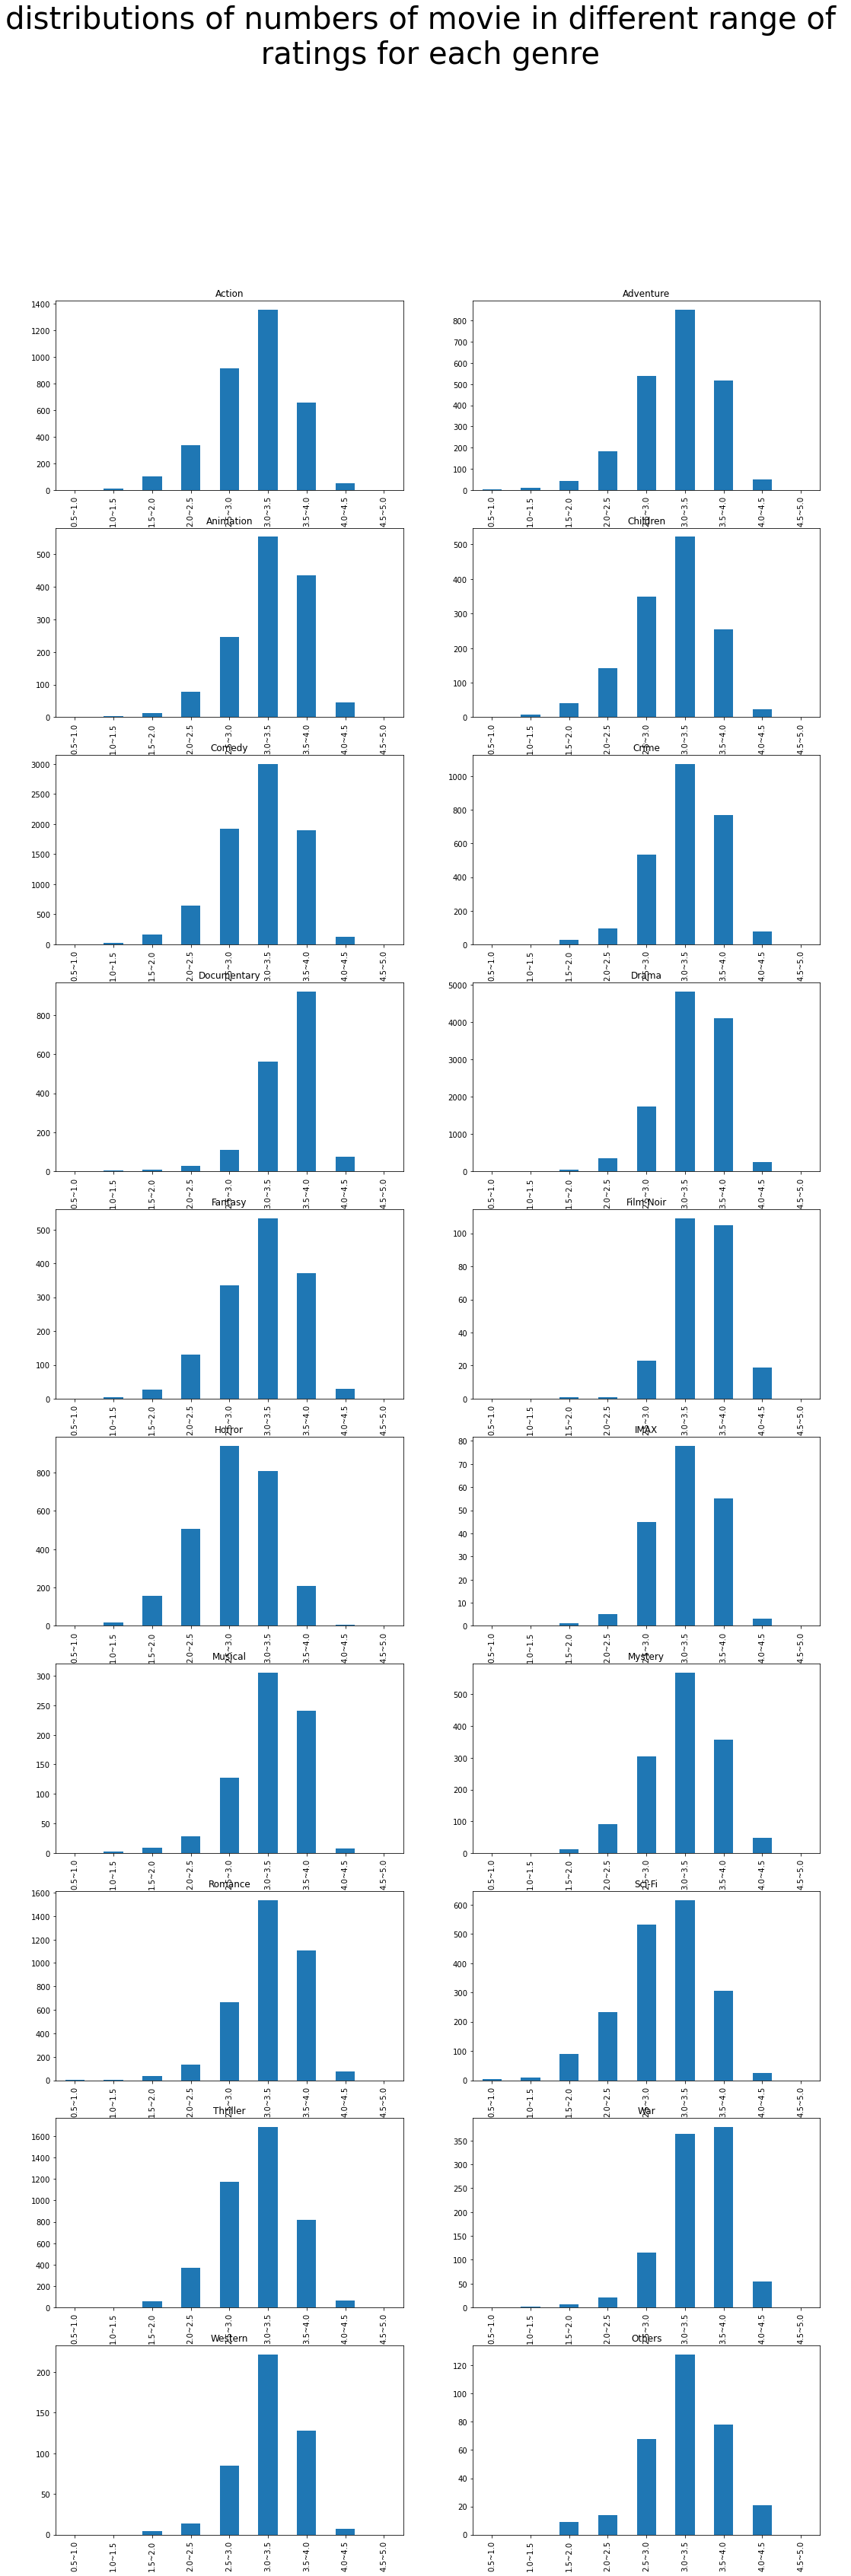

In [17]:
#draw distributions of ratings of each genres by movie
fig, axes = plt.subplots(10, 2,figsize=(18,54))
fig.suptitle('distributions of numbers of movie in different range of \n ratings for each genre',fontsize=40)
i=0
for genre in genres:
    df_genres.loc[genre,df_genres.columns[13:]].plot(ax=axes[int(i/2),i%2],kind='bar',title=genre)
    i+=1
  


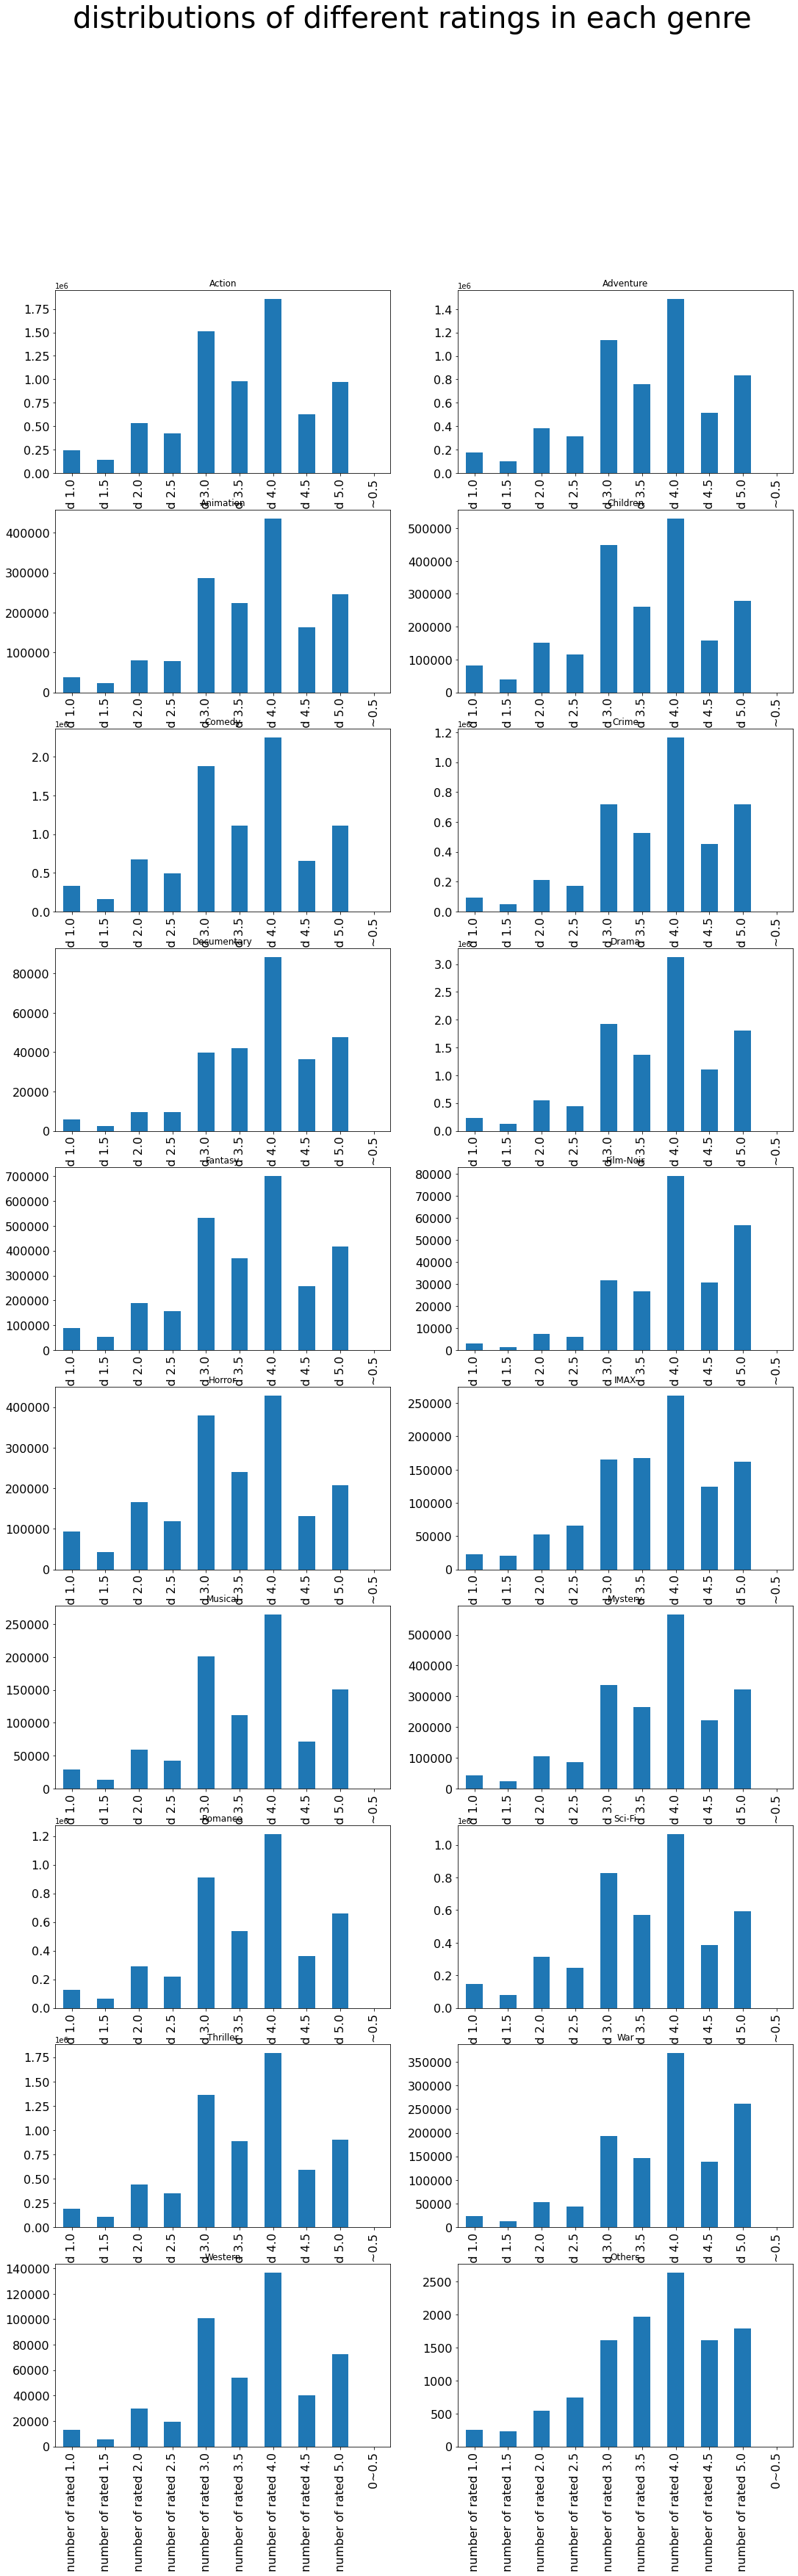

In [18]:
#draw distributions of ratings of each genres by user
fig, axes = plt.subplots(10, 2,figsize=(18,54))
fig.suptitle('distributions of different ratings in each genre',fontsize=40)
i=0
for genre in genres:
    df_genres.loc[genre,df_genres.columns[3:13:]].plot(ax=axes[int(i/2),i%2],kind='bar',title=genre,fontsize=16)
    i+=1
plt.rcParams['figure.constrained_layout.use'] = True




In [19]:
df_users[df_users['Highest Rate']-df_users['Lowest Rate']<1].sort_values(by='Average Rate').to_csv('temp.csv')

In [20]:
num_indiff_rater=df_users[df_users['Highest Rate']-df_users['Lowest Rate']<1]['Average Rate'].count()
num_rater=df_users['Average Rate'].count()
print(num_indiff_rater/num_rater)

0.00224558726721258


# Box Plots

In [21]:
df_genres

,total rating num,total movie num,number of rated 0.5,number of rated 1.0,number of rated 1.5,number of rated 2.0,number of rated 2.5,number of rated 3.0,number of rated 3.5,number of rated 4.0,...,0~0.5,0.5~1.0,1.0~1.5,1.5~2.0,2.0~2.5,2.5~3.0,3.0~3.5,3.5~4.0,4.0~4.5,4.5~5.0
Action,7406132,3428,123581.0,246003,139429,530963,423802,1509085,977736,1855981,...,0,0,12,100,336,916,1357,657,50,0
Adventure,5800184,2195,96341.0,177195,101488,384124,314050,1138210,757523,1485904,...,0,3,10,44,181,539,851,517,50,0
Animation,1600845,1373,26320.0,37837,22148,79804,78014,286900,223508,436080,...,0,0,4,13,77,245,553,435,46,0
Children,2106282,1340,41822.0,81912,39407,151660,114857,447742,261153,530099,...,0,1,8,41,142,350,522,254,22,0
Comedy,8816886,7761,159657.0,332433,165419,673320,493877,1875386,1105993,2246891,...,0,4,21,160,640,1918,3000,1892,126,0
Crime,4155857,2579,45770.0,91859,50095,213064,174642,719458,527927,1164699,...,0,0,1,29,96,535,1073,769,76,0
Documentary,287922,1716,6235.0,5714,2522,9635,9702,39687,41825,88392,...,0,1,7,10,29,112,562,921,74,0
Drama,10801709,11349,113352.0,230010,120324,552960,441861,1929105,1368084,3130364,...,0,0,4,55,359,1740,4833,4099,259,0
Fantasy,2814597,1428,52090.0,89973,52485,188247,156799,531623,368466,700185,...,0,1,4,26,130,334,533,371,29,0
Film-Noir,244011,258,1814.0,2946,1430,7506,5917,31642,26809,78885,...,0,0,0,1,1,23,109,105,19,0


In [22]:
group1=['Action','Adventure','Animation','Children','Comedy']
group2=['Crime','Documentary','Drama','Fantasy','Film-Noir']
group3=['Horror','IMAX','Musical','Mystery','Romance']
group4=['Sci-Fi','Thriller','War','Western','Others']

In [68]:
dfdict={}
i=1
for genre in genres:
    dfdict[genre]=df_populars[df_populars[genre]==True].filter(['average rate'],axis=1).assign(genre=genre)
    i += 1
    
dflist=[]
for genre in genres:
    dflist.append(dfdict[genre])

In [85]:


#print(dflist) 
cdf = pd.concat(dflist)    
mdf = pd.melt(cdf, id_vars=['genre'])
mdf.head()

#    Location Letter     value
# 0         1      A  0.223565
# 1         1      A  0.515797
# 2         1      A  0.377588
# 3         1      A  0.687614
# 4         1      A  0.094116

mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49619 entries, 0 to 49618
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genre     49619 non-null  object 
 1   variable  49619 non-null  object 
 2   value     49619 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


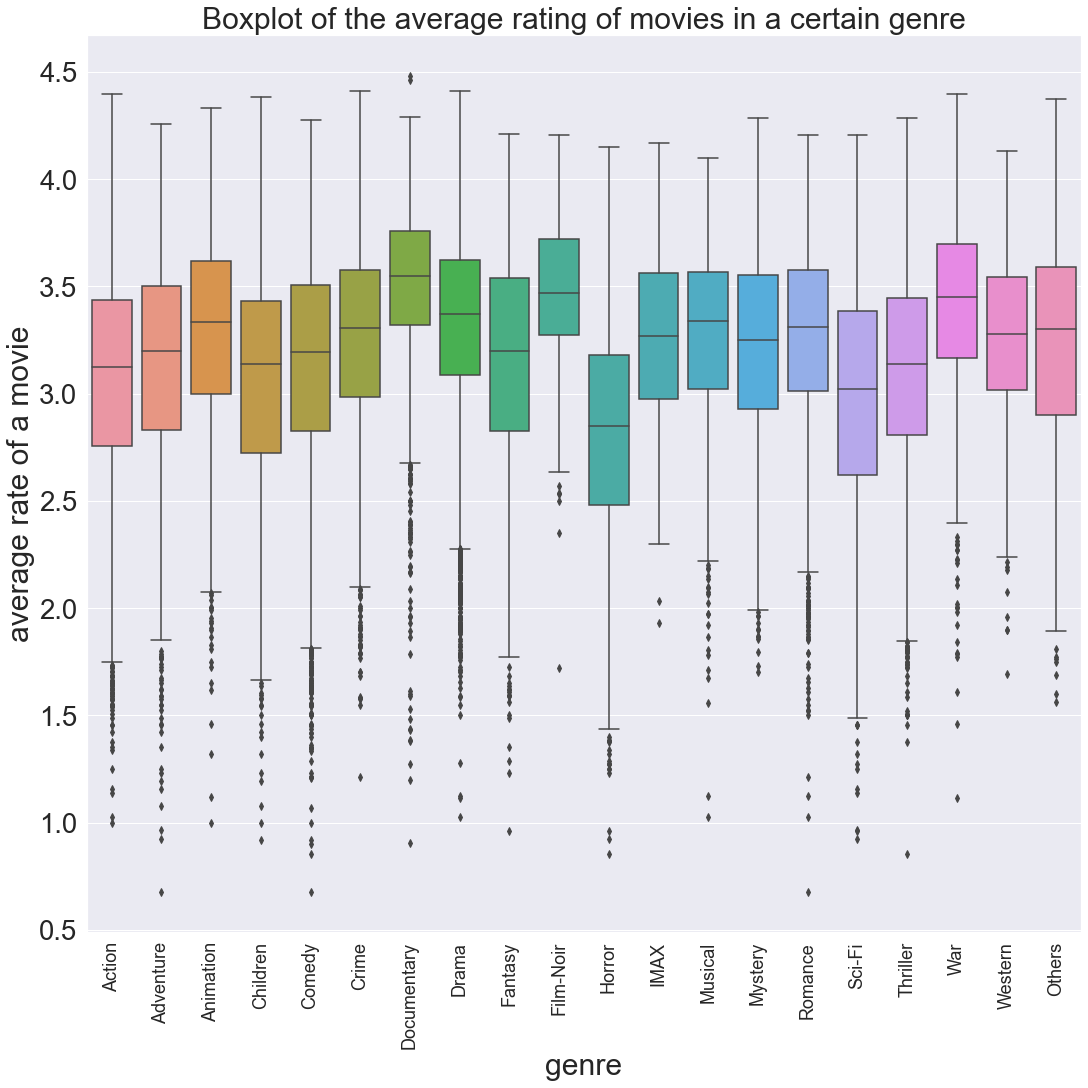

In [96]:
sns.set(rc={'figure.figsize':(15,15)},font_scale=2.5)

ax = sns.boxplot(x="genre", y="value", data=mdf)  
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontsize = 18)
ax.set(ylabel='average rate of a movie')
ax.set_title('Boxplot of the average rating of movies in a certain genre')
plt.show()